# Защита персональных данных клиентов

### Описание проекта

Необходимо защитить данные клиентов страховой компании «Хоть потоп». Для этого разработаем метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Метод преобразовании данных не должен повлиять на качество моделей машинного обучения.

### Загрузим и изучим данные.

In [1]:
import numpy as np
import pandas as pd

from numpy.linalg import inv

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('datasets/insurance.csv')

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


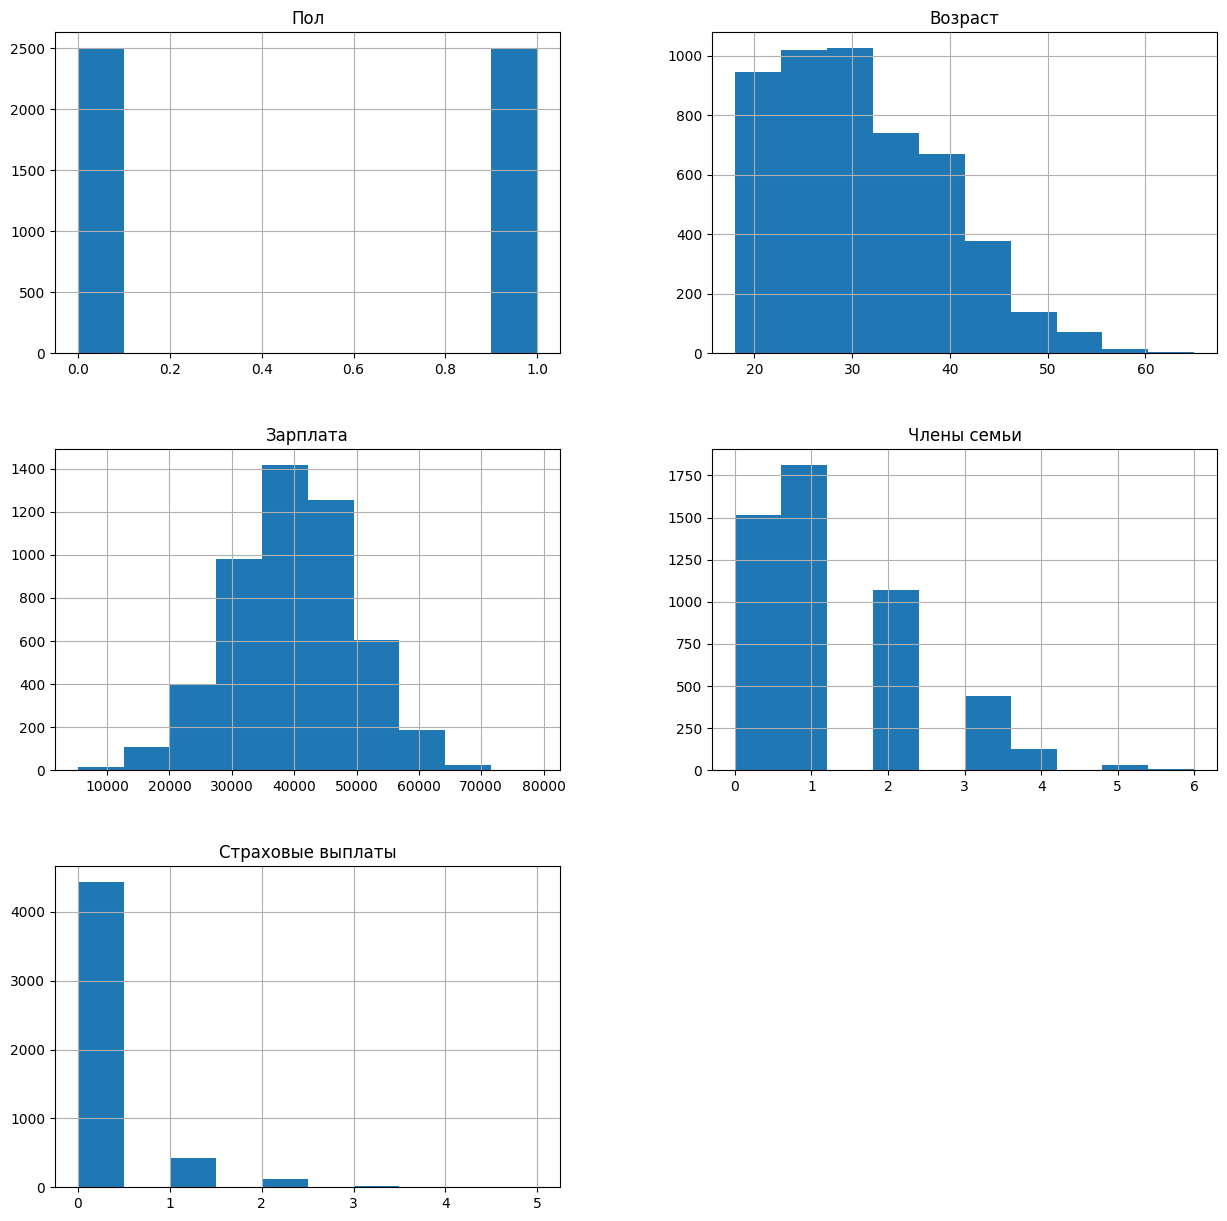

In [5]:
df.hist(figsize=(15, 15));

In [6]:
df[df.duplicated()]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0
...,...,...,...,...,...
4793,1,24.0,37800.0,0,0
4902,1,35.0,38700.0,1,0
4935,1,19.0,32700.0,0,0
4945,1,21.0,45800.0,0,0


In [7]:
df = df.drop_duplicates()

После удаления повторов в датасете можно приступать к выполнению задачи.

In [8]:
df.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.001953,0.015456,-0.007315,0.011565
Возраст,0.001953,1.000000,-0.017386,-0.009064,0.654964
Зарплата,0.015456,-0.017386,1.000000,-0.031687,-0.013123
Члены семьи,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
Страховые выплаты,0.011565,0.654964,-0.013123,-0.039303,1.000000


### Обоснование предлагаемого метода преобразования данных.

В качестве метода преобразования данных применим умножение массива данных на обратимую матрицу, качество линейной модели при этом не должно измениться.

Применямые обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $a = Xw$ — предсказания

- $w = \arg\min_w MSE(Xw, y)$ — задача обучения

- $w = (X^T X)^{-1} X^T y$ — формула обучения

Пусть a' - это предсказание, в которое мы передали матрицу признаков X, умноженную на матрицу
$$
a' = X'w'
$$
$$
X' = XP
$$
$$
w' = (XP^T XP)^{-1} XP^T y
$$

В соответствии с формулой предсказания:
$$
a' = XP \times ((XP)^T(XP))^{-1} (XP)^Ty
$$

По свойству транспонирования: $(AB)^T = B^T A^T$
$$
a' = XP \times (P^TX^TXP)^{-1}P^TX^Ty
$$

По свойству $(AB)^{-1} = B^{-1} A^{-1}$:
$$
(P^TX^TXP)^{-1} = (X^TXP)^{-1}(P^T)^{-1} = P^{-1}(X^TX)^{-1}(P^T)^{-1}
$$
$$
a' = XP \times P^{-1}(X^TX)^{-1}(P^T)^{-1} \times P^TX^Ty =
$$
$$
= X \times (P \times P^{-1}) \times (X^TX)^{-1} \times ((P^T)^{-1} \times P^T) \times X^ty  
$$

Т.к. умноженные друг на друга обратные матрицы дают в результате единичную матрицу, а матрицы умноженные на единичную матрицу остаются без изменений, то получим:
$$
a' = X E (X^TX)^{-1}E X^T y = X(X^TX)^{-1}X^Ty
$$

Т.е. 
$$
a' = X(X^T X)^{-1} X^T y = a,
$$ а значит предсказания полученные на исходном массиве данных и на массиве, умноженном на обратимую матрицу, не будут отличаться.

Рассмотрим, как связаны параметры линейной регрессии в исходной массиве и в 
преобразованном.

$$
w = (X^T X)^{-1} X^T y
$$
    
$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$   

$$
w' = (P^TX^T XP)^{-1} P^TX^T y
$$ 

$$
w' = P^{-1}X^{-1}(X^T)^{-1}(P^T)^{-1}P^TX^Ty
$$ 

$$
w' = P^{-1}X^{-1}(X^T)^{-1}X^Ty
$$ 

$$
w' = P^{-1}(X^TX)^{-1}X^Ty
$$ 

Т.к. $(X^T X)^{-1} X^T y = w$, то:

$$
w' = P^{-1}w
$$ 

Т.е. чтобы получить вектор линейной ререссии после преобразования, необходимо умножить матрицу, обратную той на которую умножаются признаки, на изначальный вектор  линейной регрессии.

### Алгоритм преобразования

На основании изложенного выше, алгоритм преобразования будет выглядеть следующим образом:
1. Выделим из датасета целевые и нецелевые признаки.
1. Создадим случайную квадратную матрицу $ n \times n$, где n - количество нецелевых признаков. 
1. Проверим, что матрица является обратимой, и сохраним её для возможных преобразований в дальнейшем.
1. Умножим нецелевые признаки на полученную матрицу.
1. Применим преобразованные признаки для модели линейной регресии.

In [9]:
target = df['Страховые выплаты']
features = df.drop('Страховые выплаты', axis=1)

In [10]:
def get_invertible_matrix(size):
    matrix = np.random.rand(size, size)
    if np.linalg.det(matrix) == 0:
        return get_invertible_matrix(size)
    else:
        return matrix

In [11]:
conversion_matrix = get_invertible_matrix(features.shape[1])
conversion_matrix

array([[0.800805  , 0.63816832, 0.79582798, 0.84087379],
       [0.5337055 , 0.92647184, 0.79506837, 0.01257377],
       [0.57908452, 0.92069254, 0.40924569, 0.90827113],
       [0.81984648, 0.29812353, 0.24010216, 0.91876688]])

In [12]:
features_converted = features @ conversion_matrix

In [13]:
features_converted.head()

,0,1,2,3
0,28746.094982,45705.271645,20332.220099,45052.523386
1,22030.582223,35029.232366,15588.149576,34515.800233
2,12176.252470,19361.411033,8617.216533,19074.058442
3,24160.672172,38412.931093,17082.722032,37877.007849
4,15129.850643,24056.654686,10704.370326,23707.069523


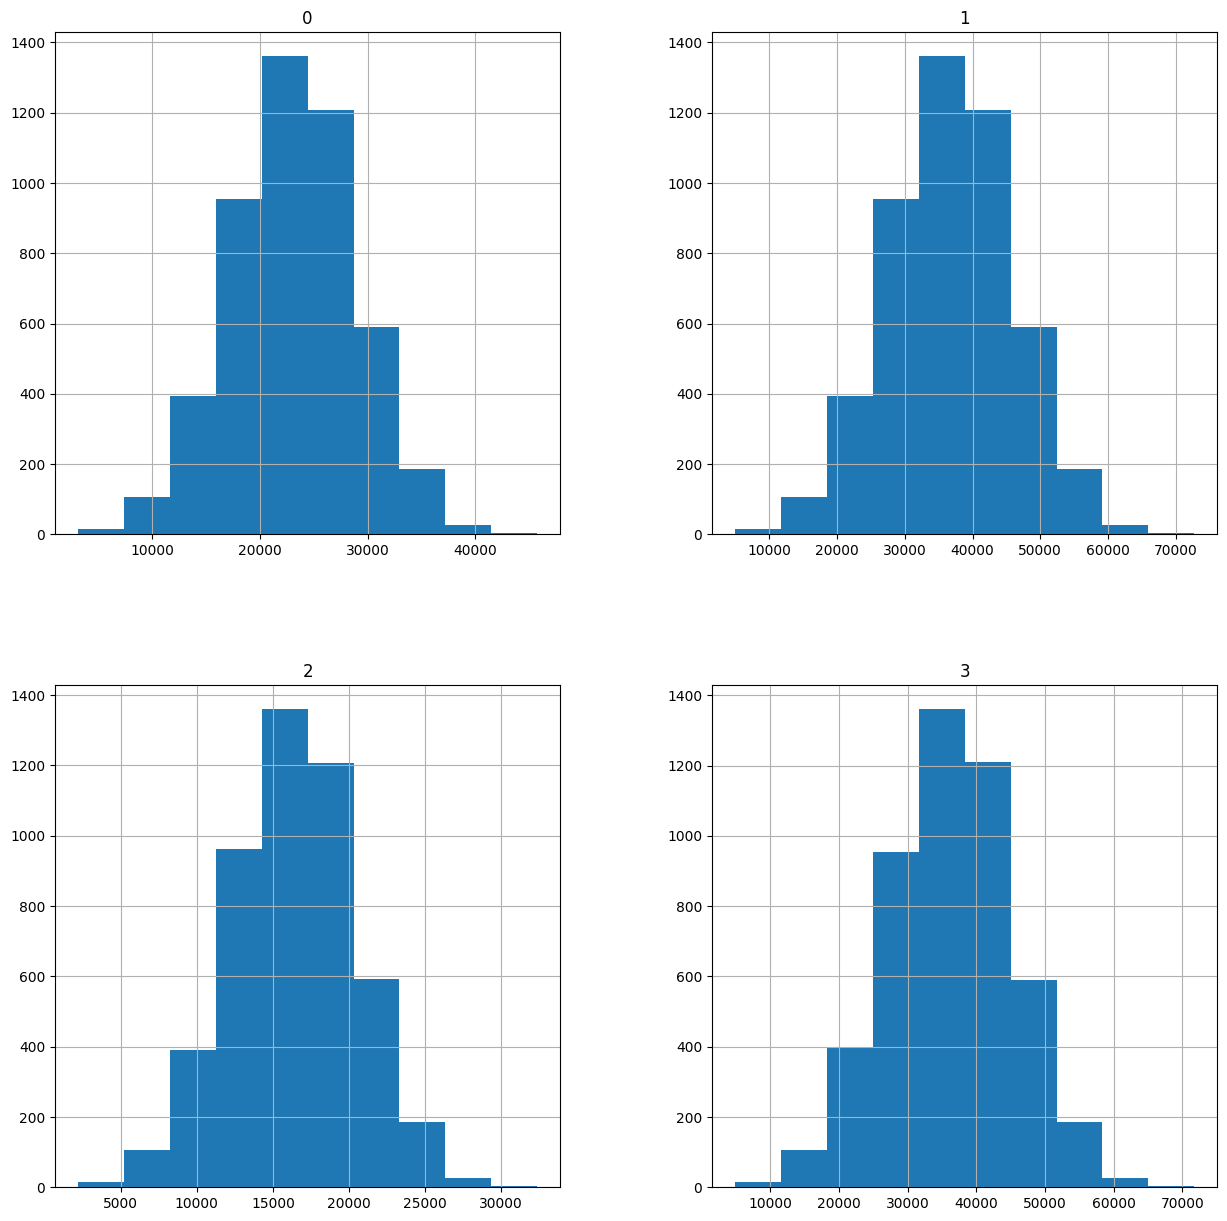

In [14]:
features_converted.hist(figsize=(15, 15));

Преобразованные таким образом нецелевые признаки не дают реального представления о персональных данных клиентов и не влияют на качество обучения модели линейной регресии.

### Проверка алгоритма

Разделим исходный датасет на обучающую и тестовую выборки, создадим модель линейной регрессии и оценим её метрикой R2.

In [15]:
features_train, features_test, target_train, target_test = \
train_test_split(features, target, test_size=0.25, random_state=42)

In [16]:
model = LinearRegression().fit(features_train, target_train)
predictions_initial = model.predict(features_test)
r2_initial = r2_score(target_test, predictions_initial)
r2_initial

0.44346330831611547

Повторим те же действия для нецелевых признаков, умноженных на случайную обратимую матрицу.

In [17]:
features_train, features_test, target_train, target_test = \
train_test_split(features_converted, target, test_size=0.25, random_state=42)

In [18]:
model = LinearRegression().fit(features_train, target_train)
predictions_after_conv = model.predict(features_test)
r2_after_conv = r2_score(target_test, predictions_after_conv)
r2_after_conv

0.44346330831627534

In [19]:
(r2_initial - r2_after_conv) / r2_initial 

-3.605081019060552e-13

Получили, что разность метрик, полученных на исходных и преобразованных признаках, отличается от значения исходной метрики на несколько порядков, а значит результаты моделей практически не отличаются.

## Выводы по проделанной работе

1. В качестве средста защиты персональных данных клиентов было предложено преобразование нецелевых признаков с помощью умножения на обратимую матрицу.
1. Было показано теоретически, что предсказания, полученные на исходных признаках, и предсказания, полученные на преобразованных признаках, тождественно равны.
1. На практике для работы модели линейной регрессии предлагается умножить массив с нецелевыми признаками на случайную обратимую матрицу размером $n \times n$, где n - количество нецелевых признаков.
1. На примере было показано, что разница метрик R2 на исходных и преобразованных признаках почти равна нулю, а значит преобразование не влияет на качесво модели линейной регрессии.